In [142]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target, name='target')

print(df_X.head())
print(df_y.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [143]:
def model(X, W, b):
    predictions= 0
    for i in range(X.shape[1]): 
        predictions+= X[:, i]*W[i]
    predictions+= b
    return predictions

def MSE(a, b):
    mse= ((a-b)**2).mean() 
    return mse

def loss(X, W, b, y):
    predictions= model(X, W, b)
    L= MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N= len(y)
    y_pred= model(X, W, b)
    dW= 1/N*2*X.T.dot(y_pred-y)
    db= 2*(y_pred-y).mean()
    return dW, db

In [144]:
from sklearn.model_selection import train_test_split

X = df_X.to_numpy()
y = df_y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

W = np.random.randn(X_train.shape[1])
b = np.random.randn()

In [145]:
LEARNING_RATE= 0.005 

losses= []

for i in range(1, 100001):
    dW, db= gradient(X_train, W, b, y_train)
    W-= LEARNING_RATE*dW
    b-= LEARNING_RATE*db
    L= loss(X_train, W, b, y_train)
    losses.append(L)
    if i%10== 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 25495.5083
Iteration 20 : Loss 21953.6851
Iteration 30 : Loss 19056.0927
Iteration 40 : Loss 16685.4209
Iteration 50 : Loss 14745.7211
Iteration 60 : Loss 13158.5164
Iteration 70 : Loss 11859.6202
Iteration 80 : Loss 10796.5340
Iteration 90 : Loss 9926.3191
Iteration 100 : Loss 9213.8556
Iteration 110 : Loss 8630.4188
Iteration 120 : Loss 8152.5147
Iteration 130 : Loss 7760.9275
Iteration 140 : Loss 7439.9403
Iteration 150 : Loss 7176.6983
Iteration 160 : Loss 6960.6875
Iteration 170 : Loss 6783.3085
Iteration 180 : Loss 6637.5276
Iteration 190 : Loss 6517.5921
Iteration 200 : Loss 6418.7969
Iteration 210 : Loss 6337.2934
Iteration 220 : Loss 6269.9340
Iteration 230 : Loss 6214.1443
Iteration 240 : Loss 6167.8185
Iteration 250 : Loss 6129.2345
Iteration 260 : Loss 6096.9835
Iteration 270 : Loss 6069.9135
Iteration 280 : Loss 6047.0821
Iteration 290 : Loss 6027.7186
Iteration 300 : Loss 6011.1926
Iteration 310 : Loss 5996.9884
Iteration 320 : Loss 5984.6844
Iteration

Iteration 3310 : Loss 5039.5661
Iteration 3320 : Loss 5037.1756
Iteration 3330 : Loss 5034.7887
Iteration 3340 : Loss 5032.4053
Iteration 3350 : Loss 5030.0256
Iteration 3360 : Loss 5027.6494
Iteration 3370 : Loss 5025.2768
Iteration 3380 : Loss 5022.9077
Iteration 3390 : Loss 5020.5421
Iteration 3400 : Loss 5018.1801
Iteration 3410 : Loss 5015.8217
Iteration 3420 : Loss 5013.4668
Iteration 3430 : Loss 5011.1153
Iteration 3440 : Loss 5008.7675
Iteration 3450 : Loss 5006.4231
Iteration 3460 : Loss 5004.0822
Iteration 3470 : Loss 5001.7448
Iteration 3480 : Loss 4999.4109
Iteration 3490 : Loss 4997.0805
Iteration 3500 : Loss 4994.7536
Iteration 3510 : Loss 4992.4302
Iteration 3520 : Loss 4990.1102
Iteration 3530 : Loss 4987.7937
Iteration 3540 : Loss 4985.4807
Iteration 3550 : Loss 4983.1711
Iteration 3560 : Loss 4980.8649
Iteration 3570 : Loss 4978.5622
Iteration 3580 : Loss 4976.2629
Iteration 3590 : Loss 4973.9671
Iteration 3600 : Loss 4971.6747
Iteration 3610 : Loss 4969.3857
Iteratio

Iteration 6410 : Loss 4443.8916
Iteration 6420 : Loss 4442.3671
Iteration 6430 : Loss 4440.8447
Iteration 6440 : Loss 4439.3245
Iteration 6450 : Loss 4437.8063
Iteration 6460 : Loss 4436.2903
Iteration 6470 : Loss 4434.7764
Iteration 6480 : Loss 4433.2646
Iteration 6490 : Loss 4431.7549
Iteration 6500 : Loss 4430.2474
Iteration 6510 : Loss 4428.7419
Iteration 6520 : Loss 4427.2385
Iteration 6530 : Loss 4425.7372
Iteration 6540 : Loss 4424.2381
Iteration 6550 : Loss 4422.7410
Iteration 6560 : Loss 4421.2460
Iteration 6570 : Loss 4419.7530
Iteration 6580 : Loss 4418.2622
Iteration 6590 : Loss 4416.7734
Iteration 6600 : Loss 4415.2867
Iteration 6610 : Loss 4413.8021
Iteration 6620 : Loss 4412.3195
Iteration 6630 : Loss 4410.8390
Iteration 6640 : Loss 4409.3605
Iteration 6650 : Loss 4407.8841
Iteration 6660 : Loss 4406.4098
Iteration 6670 : Loss 4404.9375
Iteration 6680 : Loss 4403.4673
Iteration 6690 : Loss 4401.9990
Iteration 6700 : Loss 4400.5329
Iteration 6710 : Loss 4399.0687
Iteratio

Iteration 9700 : Loss 4039.2236
Iteration 9710 : Loss 4038.2417
Iteration 9720 : Loss 4037.2610
Iteration 9730 : Loss 4036.2816
Iteration 9740 : Loss 4035.3034
Iteration 9750 : Loss 4034.3264
Iteration 9760 : Loss 4033.3507
Iteration 9770 : Loss 4032.3762
Iteration 9780 : Loss 4031.4030
Iteration 9790 : Loss 4030.4310
Iteration 9800 : Loss 4029.4602
Iteration 9810 : Loss 4028.4907
Iteration 9820 : Loss 4027.5224
Iteration 9830 : Loss 4026.5553
Iteration 9840 : Loss 4025.5895
Iteration 9850 : Loss 4024.6249
Iteration 9860 : Loss 4023.6614
Iteration 9870 : Loss 4022.6993
Iteration 9880 : Loss 4021.7383
Iteration 9890 : Loss 4020.7785
Iteration 9900 : Loss 4019.8200
Iteration 9910 : Loss 4018.8627
Iteration 9920 : Loss 4017.9065
Iteration 9930 : Loss 4016.9516
Iteration 9940 : Loss 4015.9979
Iteration 9950 : Loss 4015.0454
Iteration 9960 : Loss 4014.0941
Iteration 9970 : Loss 4013.1440
Iteration 9980 : Loss 4012.1951
Iteration 9990 : Loss 4011.2474
Iteration 10000 : Loss 4010.3009
Iterati

Iteration 12850 : Loss 3782.6861
Iteration 12860 : Loss 3782.0149
Iteration 12870 : Loss 3781.3446
Iteration 12880 : Loss 3780.6750
Iteration 12890 : Loss 3780.0061
Iteration 12900 : Loss 3779.3381
Iteration 12910 : Loss 3778.6708
Iteration 12920 : Loss 3778.0042
Iteration 12930 : Loss 3777.3384
Iteration 12940 : Loss 3776.6734
Iteration 12950 : Loss 3776.0091
Iteration 12960 : Loss 3775.3456
Iteration 12970 : Loss 3774.6828
Iteration 12980 : Loss 3774.0208
Iteration 12990 : Loss 3773.3596
Iteration 13000 : Loss 3772.6991
Iteration 13010 : Loss 3772.0393
Iteration 13020 : Loss 3771.3803
Iteration 13030 : Loss 3770.7220
Iteration 13040 : Loss 3770.0645
Iteration 13050 : Loss 3769.4078
Iteration 13060 : Loss 3768.7518
Iteration 13070 : Loss 3768.0965
Iteration 13080 : Loss 3767.4419
Iteration 13090 : Loss 3766.7881
Iteration 13100 : Loss 3766.1351
Iteration 13110 : Loss 3765.4828
Iteration 13120 : Loss 3764.8312
Iteration 13130 : Loss 3764.1804
Iteration 13140 : Loss 3763.5303
Iteration 

Iteration 15920 : Loss 3607.7633
Iteration 15930 : Loss 3607.2814
Iteration 15940 : Loss 3606.7999
Iteration 15950 : Loss 3606.3190
Iteration 15960 : Loss 3605.8385
Iteration 15970 : Loss 3605.3585
Iteration 15980 : Loss 3604.8790
Iteration 15990 : Loss 3604.4000
Iteration 16000 : Loss 3603.9214
Iteration 16010 : Loss 3603.4434
Iteration 16020 : Loss 3602.9658
Iteration 16030 : Loss 3602.4887
Iteration 16040 : Loss 3602.0121
Iteration 16050 : Loss 3601.5360
Iteration 16060 : Loss 3601.0604
Iteration 16070 : Loss 3600.5852
Iteration 16080 : Loss 3600.1106
Iteration 16090 : Loss 3599.6364
Iteration 16100 : Loss 3599.1626
Iteration 16110 : Loss 3598.6894
Iteration 16120 : Loss 3598.2166
Iteration 16130 : Loss 3597.7443
Iteration 16140 : Loss 3597.2725
Iteration 16150 : Loss 3596.8012
Iteration 16160 : Loss 3596.3303
Iteration 16170 : Loss 3595.8599
Iteration 16180 : Loss 3595.3900
Iteration 16190 : Loss 3594.9206
Iteration 16200 : Loss 3594.4516
Iteration 16210 : Loss 3593.9831
Iteration 

Iteration 19190 : Loss 3472.7324
Iteration 19200 : Loss 3472.3794
Iteration 19210 : Loss 3472.0267
Iteration 19220 : Loss 3471.6743
Iteration 19230 : Loss 3471.3222
Iteration 19240 : Loss 3470.9704
Iteration 19250 : Loss 3470.6190
Iteration 19260 : Loss 3470.2678
Iteration 19270 : Loss 3469.9170
Iteration 19280 : Loss 3469.5664
Iteration 19290 : Loss 3469.2162
Iteration 19300 : Loss 3468.8663
Iteration 19310 : Loss 3468.5167
Iteration 19320 : Loss 3468.1674
Iteration 19330 : Loss 3467.8185
Iteration 19340 : Loss 3467.4698
Iteration 19350 : Loss 3467.1215
Iteration 19360 : Loss 3466.7734
Iteration 19370 : Loss 3466.4257
Iteration 19380 : Loss 3466.0782
Iteration 19390 : Loss 3465.7311
Iteration 19400 : Loss 3465.3843
Iteration 19410 : Loss 3465.0378
Iteration 19420 : Loss 3464.6916
Iteration 19430 : Loss 3464.3457
Iteration 19440 : Loss 3464.0001
Iteration 19450 : Loss 3463.6548
Iteration 19460 : Loss 3463.3098
Iteration 19470 : Loss 3462.9651
Iteration 19480 : Loss 3462.6207
Iteration 

Iteration 22020 : Loss 3384.0052
Iteration 22030 : Loss 3383.7271
Iteration 22040 : Loss 3383.4492
Iteration 22050 : Loss 3383.1715
Iteration 22060 : Loss 3382.8941
Iteration 22070 : Loss 3382.6169
Iteration 22080 : Loss 3382.3399
Iteration 22090 : Loss 3382.0631
Iteration 22100 : Loss 3381.7865
Iteration 22110 : Loss 3381.5102
Iteration 22120 : Loss 3381.2340
Iteration 22130 : Loss 3380.9581
Iteration 22140 : Loss 3380.6824
Iteration 22150 : Loss 3380.4070
Iteration 22160 : Loss 3380.1317
Iteration 22170 : Loss 3379.8567
Iteration 22180 : Loss 3379.5819
Iteration 22190 : Loss 3379.3073
Iteration 22200 : Loss 3379.0329
Iteration 22210 : Loss 3378.7587
Iteration 22220 : Loss 3378.4848
Iteration 22230 : Loss 3378.2111
Iteration 22240 : Loss 3377.9376
Iteration 22250 : Loss 3377.6643
Iteration 22260 : Loss 3377.3912
Iteration 22270 : Loss 3377.1183
Iteration 22280 : Loss 3376.8457
Iteration 22290 : Loss 3376.5733
Iteration 22300 : Loss 3376.3010
Iteration 22310 : Loss 3376.0290
Iteration 

Iteration 25140 : Loss 3306.8210
Iteration 25150 : Loss 3306.6012
Iteration 25160 : Loss 3306.3815
Iteration 25170 : Loss 3306.1620
Iteration 25180 : Loss 3305.9426
Iteration 25190 : Loss 3305.7234
Iteration 25200 : Loss 3305.5043
Iteration 25210 : Loss 3305.2854
Iteration 25220 : Loss 3305.0667
Iteration 25230 : Loss 3304.8481
Iteration 25240 : Loss 3304.6296
Iteration 25250 : Loss 3304.4114
Iteration 25260 : Loss 3304.1932
Iteration 25270 : Loss 3303.9753
Iteration 25280 : Loss 3303.7574
Iteration 25290 : Loss 3303.5398
Iteration 25300 : Loss 3303.3223
Iteration 25310 : Loss 3303.1049
Iteration 25320 : Loss 3302.8877
Iteration 25330 : Loss 3302.6707
Iteration 25340 : Loss 3302.4538
Iteration 25350 : Loss 3302.2370
Iteration 25360 : Loss 3302.0204
Iteration 25370 : Loss 3301.8040
Iteration 25380 : Loss 3301.5877
Iteration 25390 : Loss 3301.3716
Iteration 25400 : Loss 3301.1556
Iteration 25410 : Loss 3300.9398
Iteration 25420 : Loss 3300.7242
Iteration 25430 : Loss 3300.5086
Iteration 

Iteration 28280 : Loss 3244.7347
Iteration 28290 : Loss 3244.5571
Iteration 28300 : Loss 3244.3795
Iteration 28310 : Loss 3244.2021
Iteration 28320 : Loss 3244.0248
Iteration 28330 : Loss 3243.8476
Iteration 28340 : Loss 3243.6705
Iteration 28350 : Loss 3243.4935
Iteration 28360 : Loss 3243.3167
Iteration 28370 : Loss 3243.1399
Iteration 28380 : Loss 3242.9633
Iteration 28390 : Loss 3242.7868
Iteration 28400 : Loss 3242.6104
Iteration 28410 : Loss 3242.4341
Iteration 28420 : Loss 3242.2579
Iteration 28430 : Loss 3242.0819
Iteration 28440 : Loss 3241.9059
Iteration 28450 : Loss 3241.7301
Iteration 28460 : Loss 3241.5544
Iteration 28470 : Loss 3241.3787
Iteration 28480 : Loss 3241.2033
Iteration 28490 : Loss 3241.0279
Iteration 28500 : Loss 3240.8526
Iteration 28510 : Loss 3240.6775
Iteration 28520 : Loss 3240.5024
Iteration 28530 : Loss 3240.3275
Iteration 28540 : Loss 3240.1527
Iteration 28550 : Loss 3239.9780
Iteration 28560 : Loss 3239.8034
Iteration 28570 : Loss 3239.6289
Iteration 

Iteration 31830 : Loss 3188.1792
Iteration 31840 : Loss 3188.0366
Iteration 31850 : Loss 3187.8940
Iteration 31860 : Loss 3187.7515
Iteration 31870 : Loss 3187.6091
Iteration 31880 : Loss 3187.4668
Iteration 31890 : Loss 3187.3245
Iteration 31900 : Loss 3187.1824
Iteration 31910 : Loss 3187.0403
Iteration 31920 : Loss 3186.8983
Iteration 31930 : Loss 3186.7564
Iteration 31940 : Loss 3186.6146
Iteration 31950 : Loss 3186.4729
Iteration 31960 : Loss 3186.3312
Iteration 31970 : Loss 3186.1896
Iteration 31980 : Loss 3186.0481
Iteration 31990 : Loss 3185.9067
Iteration 32000 : Loss 3185.7654
Iteration 32010 : Loss 3185.6242
Iteration 32020 : Loss 3185.4830
Iteration 32030 : Loss 3185.3420
Iteration 32040 : Loss 3185.2010
Iteration 32050 : Loss 3185.0601
Iteration 32060 : Loss 3184.9193
Iteration 32070 : Loss 3184.7785
Iteration 32080 : Loss 3184.6379
Iteration 32090 : Loss 3184.4973
Iteration 32100 : Loss 3184.3568
Iteration 32110 : Loss 3184.2164
Iteration 32120 : Loss 3184.0761
Iteration 

Iteration 35020 : Loss 3146.6175
Iteration 35030 : Loss 3146.4987
Iteration 35040 : Loss 3146.3800
Iteration 35050 : Loss 3146.2613
Iteration 35060 : Loss 3146.1427
Iteration 35070 : Loss 3146.0241
Iteration 35080 : Loss 3145.9056
Iteration 35090 : Loss 3145.7872
Iteration 35100 : Loss 3145.6689
Iteration 35110 : Loss 3145.5506
Iteration 35120 : Loss 3145.4324
Iteration 35130 : Loss 3145.3142
Iteration 35140 : Loss 3145.1961
Iteration 35150 : Loss 3145.0781
Iteration 35160 : Loss 3144.9602
Iteration 35170 : Loss 3144.8423
Iteration 35180 : Loss 3144.7245
Iteration 35190 : Loss 3144.6067
Iteration 35200 : Loss 3144.4890
Iteration 35210 : Loss 3144.3714
Iteration 35220 : Loss 3144.2538
Iteration 35230 : Loss 3144.1363
Iteration 35240 : Loss 3144.0189
Iteration 35250 : Loss 3143.9015
Iteration 35260 : Loss 3143.7842
Iteration 35270 : Loss 3143.6670
Iteration 35280 : Loss 3143.5498
Iteration 35290 : Loss 3143.4327
Iteration 35300 : Loss 3143.3157
Iteration 35310 : Loss 3143.1987
Iteration 

Iteration 37800 : Loss 3115.9757
Iteration 37810 : Loss 3115.8736
Iteration 37820 : Loss 3115.7716
Iteration 37830 : Loss 3115.6696
Iteration 37840 : Loss 3115.5676
Iteration 37850 : Loss 3115.4657
Iteration 37860 : Loss 3115.3639
Iteration 37870 : Loss 3115.2621
Iteration 37880 : Loss 3115.1604
Iteration 37890 : Loss 3115.0587
Iteration 37900 : Loss 3114.9571
Iteration 37910 : Loss 3114.8555
Iteration 37920 : Loss 3114.7540
Iteration 37930 : Loss 3114.6525
Iteration 37940 : Loss 3114.5511
Iteration 37950 : Loss 3114.4498
Iteration 37960 : Loss 3114.3485
Iteration 37970 : Loss 3114.2472
Iteration 37980 : Loss 3114.1460
Iteration 37990 : Loss 3114.0449
Iteration 38000 : Loss 3113.9438
Iteration 38010 : Loss 3113.8428
Iteration 38020 : Loss 3113.7418
Iteration 38030 : Loss 3113.6409
Iteration 38040 : Loss 3113.5400
Iteration 38050 : Loss 3113.4392
Iteration 38060 : Loss 3113.3384
Iteration 38070 : Loss 3113.2377
Iteration 38080 : Loss 3113.1371
Iteration 38090 : Loss 3113.0365
Iteration 

Iteration 40880 : Loss 3086.9387
Iteration 40890 : Loss 3086.8518
Iteration 40900 : Loss 3086.7649
Iteration 40910 : Loss 3086.6781
Iteration 40920 : Loss 3086.5914
Iteration 40930 : Loss 3086.5047
Iteration 40940 : Loss 3086.4180
Iteration 40950 : Loss 3086.3314
Iteration 40960 : Loss 3086.2448
Iteration 40970 : Loss 3086.1582
Iteration 40980 : Loss 3086.0718
Iteration 40990 : Loss 3085.9853
Iteration 41000 : Loss 3085.8989
Iteration 41010 : Loss 3085.8125
Iteration 41020 : Loss 3085.7262
Iteration 41030 : Loss 3085.6400
Iteration 41040 : Loss 3085.5537
Iteration 41050 : Loss 3085.4676
Iteration 41060 : Loss 3085.3814
Iteration 41070 : Loss 3085.2953
Iteration 41080 : Loss 3085.2093
Iteration 41090 : Loss 3085.1233
Iteration 41100 : Loss 3085.0373
Iteration 41110 : Loss 3084.9514
Iteration 41120 : Loss 3084.8655
Iteration 41130 : Loss 3084.7797
Iteration 41140 : Loss 3084.6939
Iteration 41150 : Loss 3084.6082
Iteration 41160 : Loss 3084.5225
Iteration 41170 : Loss 3084.4369
Iteration 

Iteration 44220 : Loss 3060.2458
Iteration 44230 : Loss 3060.1725
Iteration 44240 : Loss 3060.0992
Iteration 44250 : Loss 3060.0259
Iteration 44260 : Loss 3059.9526
Iteration 44270 : Loss 3059.8794
Iteration 44280 : Loss 3059.8063
Iteration 44290 : Loss 3059.7331
Iteration 44300 : Loss 3059.6600
Iteration 44310 : Loss 3059.5870
Iteration 44320 : Loss 3059.5139
Iteration 44330 : Loss 3059.4410
Iteration 44340 : Loss 3059.3680
Iteration 44350 : Loss 3059.2951
Iteration 44360 : Loss 3059.2222
Iteration 44370 : Loss 3059.1494
Iteration 44380 : Loss 3059.0766
Iteration 44390 : Loss 3059.0038
Iteration 44400 : Loss 3058.9311
Iteration 44410 : Loss 3058.8584
Iteration 44420 : Loss 3058.7857
Iteration 44430 : Loss 3058.7131
Iteration 44440 : Loss 3058.6405
Iteration 44450 : Loss 3058.5679
Iteration 44460 : Loss 3058.4954
Iteration 44470 : Loss 3058.4229
Iteration 44480 : Loss 3058.3505
Iteration 44490 : Loss 3058.2781
Iteration 44500 : Loss 3058.2057
Iteration 44510 : Loss 3058.1334
Iteration 

Iteration 47260 : Loss 3039.5415
Iteration 47270 : Loss 3039.4783
Iteration 47280 : Loss 3039.4152
Iteration 47290 : Loss 3039.3522
Iteration 47300 : Loss 3039.2892
Iteration 47310 : Loss 3039.2262
Iteration 47320 : Loss 3039.1632
Iteration 47330 : Loss 3039.1003
Iteration 47340 : Loss 3039.0374
Iteration 47350 : Loss 3038.9745
Iteration 47360 : Loss 3038.9117
Iteration 47370 : Loss 3038.8489
Iteration 47380 : Loss 3038.7861
Iteration 47390 : Loss 3038.7233
Iteration 47400 : Loss 3038.6606
Iteration 47410 : Loss 3038.5979
Iteration 47420 : Loss 3038.5353
Iteration 47430 : Loss 3038.4726
Iteration 47440 : Loss 3038.4100
Iteration 47450 : Loss 3038.3475
Iteration 47460 : Loss 3038.2849
Iteration 47470 : Loss 3038.2224
Iteration 47480 : Loss 3038.1600
Iteration 47490 : Loss 3038.0975
Iteration 47500 : Loss 3038.0351
Iteration 47510 : Loss 3037.9727
Iteration 47520 : Loss 3037.9104
Iteration 47530 : Loss 3037.8481
Iteration 47540 : Loss 3037.7858
Iteration 47550 : Loss 3037.7235
Iteration 

Iteration 50420 : Loss 3021.0488
Iteration 50430 : Loss 3020.9946
Iteration 50440 : Loss 3020.9405
Iteration 50450 : Loss 3020.8864
Iteration 50460 : Loss 3020.8323
Iteration 50470 : Loss 3020.7783
Iteration 50480 : Loss 3020.7242
Iteration 50490 : Loss 3020.6702
Iteration 50500 : Loss 3020.6163
Iteration 50510 : Loss 3020.5623
Iteration 50520 : Loss 3020.5084
Iteration 50530 : Loss 3020.4545
Iteration 50540 : Loss 3020.4007
Iteration 50550 : Loss 3020.3468
Iteration 50560 : Loss 3020.2930
Iteration 50570 : Loss 3020.2392
Iteration 50580 : Loss 3020.1854
Iteration 50590 : Loss 3020.1317
Iteration 50600 : Loss 3020.0780
Iteration 50610 : Loss 3020.0243
Iteration 50620 : Loss 3019.9707
Iteration 50630 : Loss 3019.9170
Iteration 50640 : Loss 3019.8634
Iteration 50650 : Loss 3019.8098
Iteration 50660 : Loss 3019.7563
Iteration 50670 : Loss 3019.7027
Iteration 50680 : Loss 3019.6492
Iteration 50690 : Loss 3019.5958
Iteration 50700 : Loss 3019.5423
Iteration 50710 : Loss 3019.4889
Iteration 

Iteration 53480 : Loss 3005.6301
Iteration 53490 : Loss 3005.5833
Iteration 53500 : Loss 3005.5365
Iteration 53510 : Loss 3005.4898
Iteration 53520 : Loss 3005.4430
Iteration 53530 : Loss 3005.3963
Iteration 53540 : Loss 3005.3497
Iteration 53550 : Loss 3005.3030
Iteration 53560 : Loss 3005.2563
Iteration 53570 : Loss 3005.2097
Iteration 53580 : Loss 3005.1631
Iteration 53590 : Loss 3005.1166
Iteration 53600 : Loss 3005.0700
Iteration 53610 : Loss 3005.0235
Iteration 53620 : Loss 3004.9770
Iteration 53630 : Loss 3004.9305
Iteration 53640 : Loss 3004.8840
Iteration 53650 : Loss 3004.8376
Iteration 53660 : Loss 3004.7911
Iteration 53670 : Loss 3004.7447
Iteration 53680 : Loss 3004.6984
Iteration 53690 : Loss 3004.6520
Iteration 53700 : Loss 3004.6057
Iteration 53710 : Loss 3004.5594
Iteration 53720 : Loss 3004.5131
Iteration 53730 : Loss 3004.4668
Iteration 53740 : Loss 3004.4206
Iteration 53750 : Loss 3004.3743
Iteration 53760 : Loss 3004.3281
Iteration 53770 : Loss 3004.2820
Iteration 

Iteration 56710 : Loss 2991.6063
Iteration 56720 : Loss 2991.5661
Iteration 56730 : Loss 2991.5259
Iteration 56740 : Loss 2991.4858
Iteration 56750 : Loss 2991.4456
Iteration 56760 : Loss 2991.4055
Iteration 56770 : Loss 2991.3654
Iteration 56780 : Loss 2991.3253
Iteration 56790 : Loss 2991.2852
Iteration 56800 : Loss 2991.2452
Iteration 56810 : Loss 2991.2052
Iteration 56820 : Loss 2991.1651
Iteration 56830 : Loss 2991.1251
Iteration 56840 : Loss 2991.0852
Iteration 56850 : Loss 2991.0452
Iteration 56860 : Loss 2991.0053
Iteration 56870 : Loss 2990.9654
Iteration 56880 : Loss 2990.9255
Iteration 56890 : Loss 2990.8856
Iteration 56900 : Loss 2990.8457
Iteration 56910 : Loss 2990.8059
Iteration 56920 : Loss 2990.7660
Iteration 56930 : Loss 2990.7262
Iteration 56940 : Loss 2990.6865
Iteration 56950 : Loss 2990.6467
Iteration 56960 : Loss 2990.6069
Iteration 56970 : Loss 2990.5672
Iteration 56980 : Loss 2990.5275
Iteration 56990 : Loss 2990.4878
Iteration 57000 : Loss 2990.4481
Iteration 

Iteration 59900 : Loss 2979.6865
Iteration 59910 : Loss 2979.6518
Iteration 59920 : Loss 2979.6172
Iteration 59930 : Loss 2979.5826
Iteration 59940 : Loss 2979.5479
Iteration 59950 : Loss 2979.5133
Iteration 59960 : Loss 2979.4788
Iteration 59970 : Loss 2979.4442
Iteration 59980 : Loss 2979.4096
Iteration 59990 : Loss 2979.3751
Iteration 60000 : Loss 2979.3406
Iteration 60010 : Loss 2979.3061
Iteration 60020 : Loss 2979.2716
Iteration 60030 : Loss 2979.2371
Iteration 60040 : Loss 2979.2027
Iteration 60050 : Loss 2979.1682
Iteration 60060 : Loss 2979.1338
Iteration 60070 : Loss 2979.0994
Iteration 60080 : Loss 2979.0650
Iteration 60090 : Loss 2979.0306
Iteration 60100 : Loss 2978.9963
Iteration 60110 : Loss 2978.9619
Iteration 60120 : Loss 2978.9276
Iteration 60130 : Loss 2978.8933
Iteration 60140 : Loss 2978.8590
Iteration 60150 : Loss 2978.8247
Iteration 60160 : Loss 2978.7904
Iteration 60170 : Loss 2978.7562
Iteration 60180 : Loss 2978.7220
Iteration 60190 : Loss 2978.6877
Iteration 

Iteration 63080 : Loss 2969.4296
Iteration 63090 : Loss 2969.3996
Iteration 63100 : Loss 2969.3697
Iteration 63110 : Loss 2969.3398
Iteration 63120 : Loss 2969.3098
Iteration 63130 : Loss 2969.2799
Iteration 63140 : Loss 2969.2501
Iteration 63150 : Loss 2969.2202
Iteration 63160 : Loss 2969.1903
Iteration 63170 : Loss 2969.1605
Iteration 63180 : Loss 2969.1306
Iteration 63190 : Loss 2969.1008
Iteration 63200 : Loss 2969.0710
Iteration 63210 : Loss 2969.0412
Iteration 63220 : Loss 2969.0115
Iteration 63230 : Loss 2968.9817
Iteration 63240 : Loss 2968.9519
Iteration 63250 : Loss 2968.9222
Iteration 63260 : Loss 2968.8925
Iteration 63270 : Loss 2968.8628
Iteration 63280 : Loss 2968.8331
Iteration 63290 : Loss 2968.8034
Iteration 63300 : Loss 2968.7737
Iteration 63310 : Loss 2968.7441
Iteration 63320 : Loss 2968.7144
Iteration 63330 : Loss 2968.6848
Iteration 63340 : Loss 2968.6552
Iteration 63350 : Loss 2968.6256
Iteration 63360 : Loss 2968.5960
Iteration 63370 : Loss 2968.5664
Iteration 

Iteration 65800 : Loss 2961.7644
Iteration 65810 : Loss 2961.7379
Iteration 65820 : Loss 2961.7115
Iteration 65830 : Loss 2961.6850
Iteration 65840 : Loss 2961.6586
Iteration 65850 : Loss 2961.6322
Iteration 65860 : Loss 2961.6058
Iteration 65870 : Loss 2961.5794
Iteration 65880 : Loss 2961.5530
Iteration 65890 : Loss 2961.5266
Iteration 65900 : Loss 2961.5002
Iteration 65910 : Loss 2961.4739
Iteration 65920 : Loss 2961.4476
Iteration 65930 : Loss 2961.4212
Iteration 65940 : Loss 2961.3949
Iteration 65950 : Loss 2961.3686
Iteration 65960 : Loss 2961.3423
Iteration 65970 : Loss 2961.3160
Iteration 65980 : Loss 2961.2898
Iteration 65990 : Loss 2961.2635
Iteration 66000 : Loss 2961.2373
Iteration 66010 : Loss 2961.2110
Iteration 66020 : Loss 2961.1848
Iteration 66030 : Loss 2961.1586
Iteration 66040 : Loss 2961.1324
Iteration 66050 : Loss 2961.1062
Iteration 66060 : Loss 2961.0800
Iteration 66070 : Loss 2961.0539
Iteration 66080 : Loss 2961.0277
Iteration 66090 : Loss 2961.0016
Iteration 

Iteration 69230 : Loss 2953.3498
Iteration 69240 : Loss 2953.3271
Iteration 69250 : Loss 2953.3044
Iteration 69260 : Loss 2953.2817
Iteration 69270 : Loss 2953.2591
Iteration 69280 : Loss 2953.2364
Iteration 69290 : Loss 2953.2138
Iteration 69300 : Loss 2953.1912
Iteration 69310 : Loss 2953.1685
Iteration 69320 : Loss 2953.1459
Iteration 69330 : Loss 2953.1233
Iteration 69340 : Loss 2953.1007
Iteration 69350 : Loss 2953.0782
Iteration 69360 : Loss 2953.0556
Iteration 69370 : Loss 2953.0331
Iteration 69380 : Loss 2953.0105
Iteration 69390 : Loss 2952.9880
Iteration 69400 : Loss 2952.9654
Iteration 69410 : Loss 2952.9429
Iteration 69420 : Loss 2952.9204
Iteration 69430 : Loss 2952.8979
Iteration 69440 : Loss 2952.8754
Iteration 69450 : Loss 2952.8530
Iteration 69460 : Loss 2952.8305
Iteration 69470 : Loss 2952.8080
Iteration 69480 : Loss 2952.7856
Iteration 69490 : Loss 2952.7632
Iteration 69500 : Loss 2952.7407
Iteration 69510 : Loss 2952.7183
Iteration 69520 : Loss 2952.6959
Iteration 

Iteration 71940 : Loss 2947.5571
Iteration 71950 : Loss 2947.5370
Iteration 71960 : Loss 2947.5169
Iteration 71970 : Loss 2947.4968
Iteration 71980 : Loss 2947.4767
Iteration 71990 : Loss 2947.4567
Iteration 72000 : Loss 2947.4366
Iteration 72010 : Loss 2947.4165
Iteration 72020 : Loss 2947.3965
Iteration 72030 : Loss 2947.3765
Iteration 72040 : Loss 2947.3564
Iteration 72050 : Loss 2947.3364
Iteration 72060 : Loss 2947.3164
Iteration 72070 : Loss 2947.2964
Iteration 72080 : Loss 2947.2764
Iteration 72090 : Loss 2947.2564
Iteration 72100 : Loss 2947.2364
Iteration 72110 : Loss 2947.2165
Iteration 72120 : Loss 2947.1965
Iteration 72130 : Loss 2947.1766
Iteration 72140 : Loss 2947.1566
Iteration 72150 : Loss 2947.1367
Iteration 72160 : Loss 2947.1168
Iteration 72170 : Loss 2947.0969
Iteration 72180 : Loss 2947.0770
Iteration 72190 : Loss 2947.0571
Iteration 72200 : Loss 2947.0372
Iteration 72210 : Loss 2947.0173
Iteration 72220 : Loss 2946.9974
Iteration 72230 : Loss 2946.9776
Iteration 

Iteration 74580 : Loss 2942.5452
Iteration 74590 : Loss 2942.5273
Iteration 74600 : Loss 2942.5094
Iteration 74610 : Loss 2942.4915
Iteration 74620 : Loss 2942.4736
Iteration 74630 : Loss 2942.4558
Iteration 74640 : Loss 2942.4379
Iteration 74650 : Loss 2942.4200
Iteration 74660 : Loss 2942.4022
Iteration 74670 : Loss 2942.3844
Iteration 74680 : Loss 2942.3665
Iteration 74690 : Loss 2942.3487
Iteration 74700 : Loss 2942.3309
Iteration 74710 : Loss 2942.3131
Iteration 74720 : Loss 2942.2953
Iteration 74730 : Loss 2942.2775
Iteration 74740 : Loss 2942.2597
Iteration 74750 : Loss 2942.2420
Iteration 74760 : Loss 2942.2242
Iteration 74770 : Loss 2942.2064
Iteration 74780 : Loss 2942.1887
Iteration 74790 : Loss 2942.1710
Iteration 74800 : Loss 2942.1532
Iteration 74810 : Loss 2942.1355
Iteration 74820 : Loss 2942.1178
Iteration 74830 : Loss 2942.1001
Iteration 74840 : Loss 2942.0824
Iteration 74850 : Loss 2942.0647
Iteration 74860 : Loss 2942.0470
Iteration 74870 : Loss 2942.0293
Iteration 

Iteration 77680 : Loss 2937.3556
Iteration 77690 : Loss 2937.3399
Iteration 77700 : Loss 2937.3243
Iteration 77710 : Loss 2937.3087
Iteration 77720 : Loss 2937.2931
Iteration 77730 : Loss 2937.2775
Iteration 77740 : Loss 2937.2619
Iteration 77750 : Loss 2937.2463
Iteration 77760 : Loss 2937.2307
Iteration 77770 : Loss 2937.2151
Iteration 77780 : Loss 2937.1996
Iteration 77790 : Loss 2937.1840
Iteration 77800 : Loss 2937.1684
Iteration 77810 : Loss 2937.1529
Iteration 77820 : Loss 2937.1374
Iteration 77830 : Loss 2937.1218
Iteration 77840 : Loss 2937.1063
Iteration 77850 : Loss 2937.0908
Iteration 77860 : Loss 2937.0752
Iteration 77870 : Loss 2937.0597
Iteration 77880 : Loss 2937.0442
Iteration 77890 : Loss 2937.0287
Iteration 77900 : Loss 2937.0133
Iteration 77910 : Loss 2936.9978
Iteration 77920 : Loss 2936.9823
Iteration 77930 : Loss 2936.9668
Iteration 77940 : Loss 2936.9514
Iteration 77950 : Loss 2936.9359
Iteration 77960 : Loss 2936.9205
Iteration 77970 : Loss 2936.9050
Iteration 

Iteration 80760 : Loss 2932.8475
Iteration 80770 : Loss 2932.8339
Iteration 80780 : Loss 2932.8202
Iteration 80790 : Loss 2932.8065
Iteration 80800 : Loss 2932.7929
Iteration 80810 : Loss 2932.7792
Iteration 80820 : Loss 2932.7655
Iteration 80830 : Loss 2932.7519
Iteration 80840 : Loss 2932.7383
Iteration 80850 : Loss 2932.7246
Iteration 80860 : Loss 2932.7110
Iteration 80870 : Loss 2932.6974
Iteration 80880 : Loss 2932.6837
Iteration 80890 : Loss 2932.6701
Iteration 80900 : Loss 2932.6565
Iteration 80910 : Loss 2932.6429
Iteration 80920 : Loss 2932.6293
Iteration 80930 : Loss 2932.6157
Iteration 80940 : Loss 2932.6022
Iteration 80950 : Loss 2932.5886
Iteration 80960 : Loss 2932.5750
Iteration 80970 : Loss 2932.5614
Iteration 80980 : Loss 2932.5479
Iteration 80990 : Loss 2932.5343
Iteration 81000 : Loss 2932.5208
Iteration 81010 : Loss 2932.5072
Iteration 81020 : Loss 2932.4937
Iteration 81030 : Loss 2932.4802
Iteration 81040 : Loss 2932.4667
Iteration 81050 : Loss 2932.4531
Iteration 

Iteration 84050 : Loss 2928.6480
Iteration 84060 : Loss 2928.6361
Iteration 84070 : Loss 2928.6242
Iteration 84080 : Loss 2928.6124
Iteration 84090 : Loss 2928.6005
Iteration 84100 : Loss 2928.5886
Iteration 84110 : Loss 2928.5768
Iteration 84120 : Loss 2928.5649
Iteration 84130 : Loss 2928.5530
Iteration 84140 : Loss 2928.5412
Iteration 84150 : Loss 2928.5294
Iteration 84160 : Loss 2928.5175
Iteration 84170 : Loss 2928.5057
Iteration 84180 : Loss 2928.4939
Iteration 84190 : Loss 2928.4820
Iteration 84200 : Loss 2928.4702
Iteration 84210 : Loss 2928.4584
Iteration 84220 : Loss 2928.4466
Iteration 84230 : Loss 2928.4348
Iteration 84240 : Loss 2928.4230
Iteration 84250 : Loss 2928.4112
Iteration 84260 : Loss 2928.3994
Iteration 84270 : Loss 2928.3876
Iteration 84280 : Loss 2928.3759
Iteration 84290 : Loss 2928.3641
Iteration 84300 : Loss 2928.3523
Iteration 84310 : Loss 2928.3406
Iteration 84320 : Loss 2928.3288
Iteration 84330 : Loss 2928.3171
Iteration 84340 : Loss 2928.3053
Iteration 

Iteration 87020 : Loss 2925.3299
Iteration 87030 : Loss 2925.3194
Iteration 87040 : Loss 2925.3089
Iteration 87050 : Loss 2925.2985
Iteration 87060 : Loss 2925.2880
Iteration 87070 : Loss 2925.2775
Iteration 87080 : Loss 2925.2671
Iteration 87090 : Loss 2925.2566
Iteration 87100 : Loss 2925.2461
Iteration 87110 : Loss 2925.2357
Iteration 87120 : Loss 2925.2252
Iteration 87130 : Loss 2925.2148
Iteration 87140 : Loss 2925.2044
Iteration 87150 : Loss 2925.1939
Iteration 87160 : Loss 2925.1835
Iteration 87170 : Loss 2925.1731
Iteration 87180 : Loss 2925.1627
Iteration 87190 : Loss 2925.1523
Iteration 87200 : Loss 2925.1418
Iteration 87210 : Loss 2925.1314
Iteration 87220 : Loss 2925.1210
Iteration 87230 : Loss 2925.1106
Iteration 87240 : Loss 2925.1003
Iteration 87250 : Loss 2925.0899
Iteration 87260 : Loss 2925.0795
Iteration 87270 : Loss 2925.0691
Iteration 87280 : Loss 2925.0587
Iteration 87290 : Loss 2925.0484
Iteration 87300 : Loss 2925.0380
Iteration 87310 : Loss 2925.0276
Iteration 

Iteration 90450 : Loss 2921.9794
Iteration 90460 : Loss 2921.9703
Iteration 90470 : Loss 2921.9612
Iteration 90480 : Loss 2921.9522
Iteration 90490 : Loss 2921.9431
Iteration 90500 : Loss 2921.9340
Iteration 90510 : Loss 2921.9250
Iteration 90520 : Loss 2921.9159
Iteration 90530 : Loss 2921.9068
Iteration 90540 : Loss 2921.8978
Iteration 90550 : Loss 2921.8887
Iteration 90560 : Loss 2921.8797
Iteration 90570 : Loss 2921.8706
Iteration 90580 : Loss 2921.8616
Iteration 90590 : Loss 2921.8526
Iteration 90600 : Loss 2921.8435
Iteration 90610 : Loss 2921.8345
Iteration 90620 : Loss 2921.8255
Iteration 90630 : Loss 2921.8165
Iteration 90640 : Loss 2921.8074
Iteration 90650 : Loss 2921.7984
Iteration 90660 : Loss 2921.7894
Iteration 90670 : Loss 2921.7804
Iteration 90680 : Loss 2921.7714
Iteration 90690 : Loss 2921.7624
Iteration 90700 : Loss 2921.7534
Iteration 90710 : Loss 2921.7444
Iteration 90720 : Loss 2921.7355
Iteration 90730 : Loss 2921.7265
Iteration 90740 : Loss 2921.7175
Iteration 

Iteration 93430 : Loss 2919.4319
Iteration 93440 : Loss 2919.4239
Iteration 93450 : Loss 2919.4159
Iteration 93460 : Loss 2919.4079
Iteration 93470 : Loss 2919.3998
Iteration 93480 : Loss 2919.3918
Iteration 93490 : Loss 2919.3838
Iteration 93500 : Loss 2919.3758
Iteration 93510 : Loss 2919.3678
Iteration 93520 : Loss 2919.3598
Iteration 93530 : Loss 2919.3518
Iteration 93540 : Loss 2919.3438
Iteration 93550 : Loss 2919.3358
Iteration 93560 : Loss 2919.3278
Iteration 93570 : Loss 2919.3198
Iteration 93580 : Loss 2919.3118
Iteration 93590 : Loss 2919.3038
Iteration 93600 : Loss 2919.2958
Iteration 93610 : Loss 2919.2879
Iteration 93620 : Loss 2919.2799
Iteration 93630 : Loss 2919.2719
Iteration 93640 : Loss 2919.2639
Iteration 93650 : Loss 2919.2560
Iteration 93660 : Loss 2919.2480
Iteration 93670 : Loss 2919.2401
Iteration 93680 : Loss 2919.2321
Iteration 93690 : Loss 2919.2242
Iteration 93700 : Loss 2919.2162
Iteration 93710 : Loss 2919.2083
Iteration 93720 : Loss 2919.2003
Iteration 

Iteration 97000 : Loss 2916.7631
Iteration 97010 : Loss 2916.7561
Iteration 97020 : Loss 2916.7492
Iteration 97030 : Loss 2916.7422
Iteration 97040 : Loss 2916.7353
Iteration 97050 : Loss 2916.7284
Iteration 97060 : Loss 2916.7214
Iteration 97070 : Loss 2916.7145
Iteration 97080 : Loss 2916.7076
Iteration 97090 : Loss 2916.7007
Iteration 97100 : Loss 2916.6937
Iteration 97110 : Loss 2916.6868
Iteration 97120 : Loss 2916.6799
Iteration 97130 : Loss 2916.6730
Iteration 97140 : Loss 2916.6661
Iteration 97150 : Loss 2916.6592
Iteration 97160 : Loss 2916.6523
Iteration 97170 : Loss 2916.6454
Iteration 97180 : Loss 2916.6385
Iteration 97190 : Loss 2916.6316
Iteration 97200 : Loss 2916.6247
Iteration 97210 : Loss 2916.6178
Iteration 97220 : Loss 2916.6109
Iteration 97230 : Loss 2916.6040
Iteration 97240 : Loss 2916.5972
Iteration 97250 : Loss 2916.5903
Iteration 97260 : Loss 2916.5834
Iteration 97270 : Loss 2916.5765
Iteration 97280 : Loss 2916.5697
Iteration 97290 : Loss 2916.5628
Iteration 

In [146]:
prediction= model(X_test, W, b)
mse= loss(X_test, W, b, y_test)
mse

2866.6802140431473

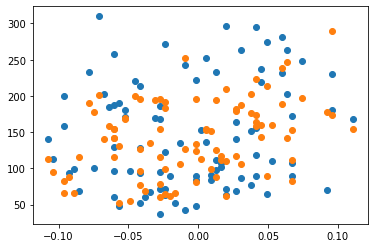

In [147]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()